# Importing libraries & data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install geopandas
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
from datetime import datetime
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.3 MB/s 
     |████████████████████████████████| 16.7 MB 402 kB/s 
     |████████████████████████████████| 6.3 MB 31.8 MB/s 


In [7]:
df2_professionals = pd.read_csv('/content/drive/MyDrive/Colab_TwitterIndicators/df_professionals.csv')
df2_men = pd.read_csv('/content/drive/MyDrive/Colab_TwitterIndicators/df_men.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,6,7,8,10,20,26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,20,26,31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [9]:
df3 = pd.read_csv('/content/drive/MyDrive/Colab_TwitterIndicators/df3.csv')
df4 = pd.read_csv('/content/drive/MyDrive/Colab_TwitterIndicators/df4.csv')
df5 = pd.read_csv('/content/drive/MyDrive/Colab_TwitterIndicators/df5.csv')

# DATA EXPLORATION

In [17]:
#CREATE A DF FOR PROFESSIONALS MERGING 2,3,4 TOGETHER
df23_professionals = pd.merge(df2_professionals,df3,how='left',on=['id'])
df234_professionals = pd.merge(df23_professionals, df4, how='left', on=['id'])

#CREATE A DF FOR MEN OF THE STREET MERGING 2,3,4 TOGETHER
df23_men = pd.merge(df2_men,df3,how='left',on=['id'])
df234_men = pd.merge(df23_men, df4, how='left', on=['id'])

In [21]:
# DROPPING USELESS COLUMNS
df234_professionals = df234_professionals.drop(['retweetPostedTime', 'retweetId',
'retweetBody', 'retweetSource', 'retweetUserId',
'retweetUserDisplayName', 'retweetUserLocation', 'retweetUserSummary',
'retweetUserStatusesCount', 'retweetUserLang',
'retweetUserPreferredName', 'retweetUserVerified',
'retweetUserFollowersCount', 'retweetUserFriendsCount',
'retweetUserFavouritesCount', 'retweetUserPostedTime','Unnamed: 0_x','Unnamed: 0_y','Unnamed: 0'	],axis=1)

df234_men = df234_men.drop(['retweetPostedTime', 'retweetId',
'retweetBody', 'retweetSource', 'retweetUserId',
'retweetUserDisplayName', 'retweetUserLocation', 'retweetUserSummary',
'retweetUserStatusesCount', 'retweetUserLang',
'retweetUserPreferredName', 'retweetUserVerified',
'retweetUserFollowersCount', 'retweetUserFriendsCount',
'retweetUserFavouritesCount', 'retweetUserPostedTime','Unnamed: 0_x','Unnamed: 0_y','Unnamed: 0'],axis=1)

The first thing that we considered interesting to analyze whether there were some missing values. From above we can clearly notice that of course we have missing values in case of retweets. Other features that contain missing values refer to the location from which the tweet was posted, or some other characteristics of a profile, such as the user bio. 

In [30]:
## Tweet per region
def tweet_per_region(df,title):
  users = df['gnipregion'].value_counts()
  users.plot.bar(figsize=(20,10))
  plt.title('Nr of tweets per region '+ title)
  plt.xlabel('Regions')
  plt.ylabel('Nr of tweets')

  return plt

  # plt.savefig("N of tweets per region.png")

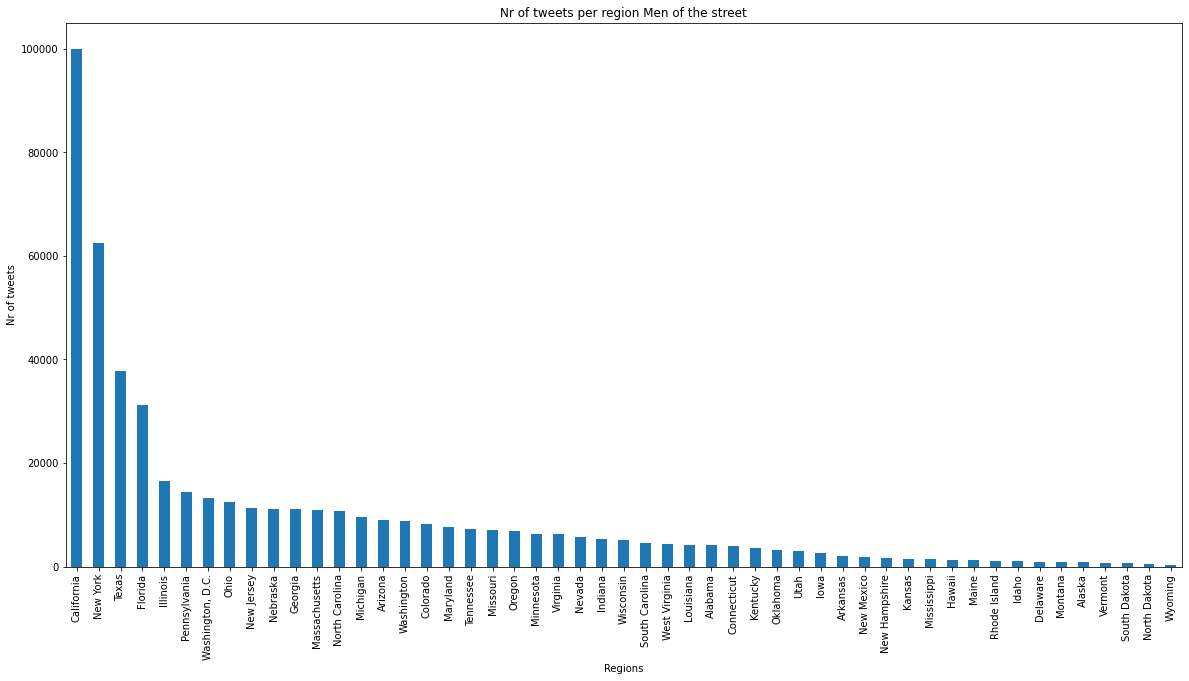

In [31]:
plt_men = tweet_per_region(df234_men,'Men of the street')

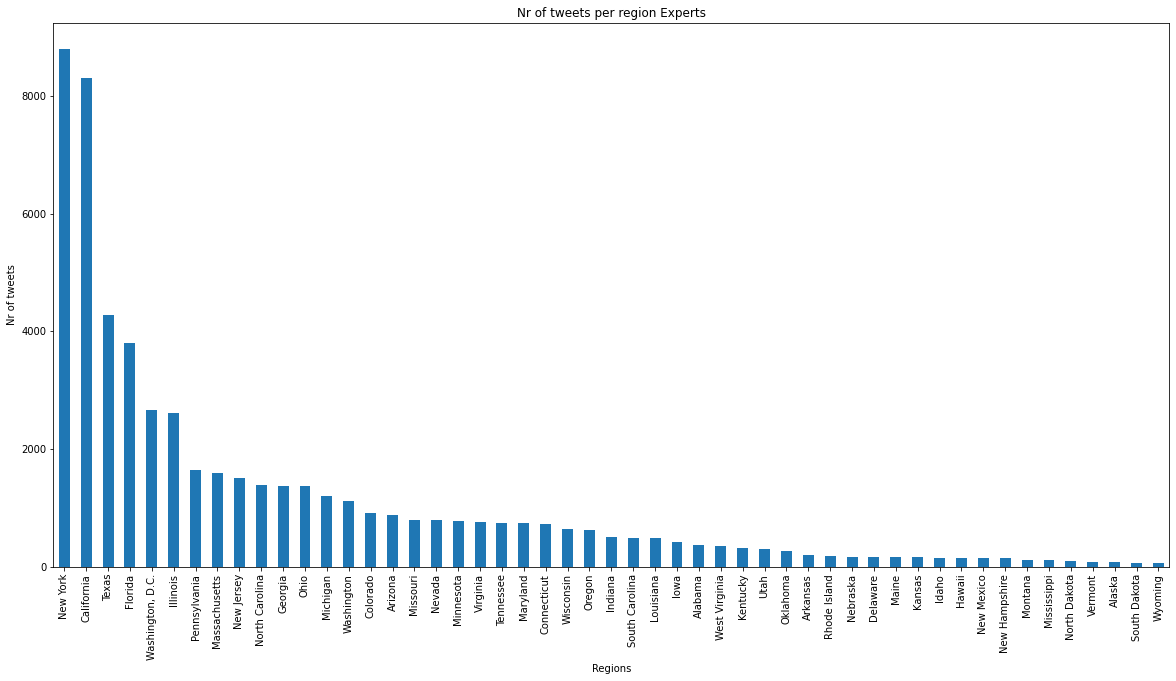

In [32]:
plt_professionals =  tweet_per_region(df234_professionals, 'Experts')

#### Nr of users per region --> non funziona

In [34]:
## users per region
users_per_region = df234_men.groupby('userId').count()['gnipregion']
users_per_region
d_m1 = pd.DataFrame(users_per_region)
d_m1.rename(columns = {'userid':'users_per_region'}, inplace = True)
d_m1

,gnipregion
userId,
0,0
1,0
10,0
102,0
11,0
...,...
id:twitter.com:999969359350173696,1
id:twitter.com:999971376,2
id:twitter.com:999972763677978625,1


#### Top 20 hashtags

In [ ]:
## Top 20 hashtags overall
#hashtag = df1234['hashtag'].value_counts()
#hashtag[0:30].plot.bar(figsize=(20,10))

In [36]:
## Top 20 hashtags overall
def top_hashtags(df,title):
  hashtag = df['hashtag'].value_counts()
  hashtag[0:20].plot.bar(figsize=(20,10))
  plt.title('Nr of hashtags used by ' + title)
  plt.xlabel('Hashtags')
  plt.ylabel('Nr of tweets')
  return plt

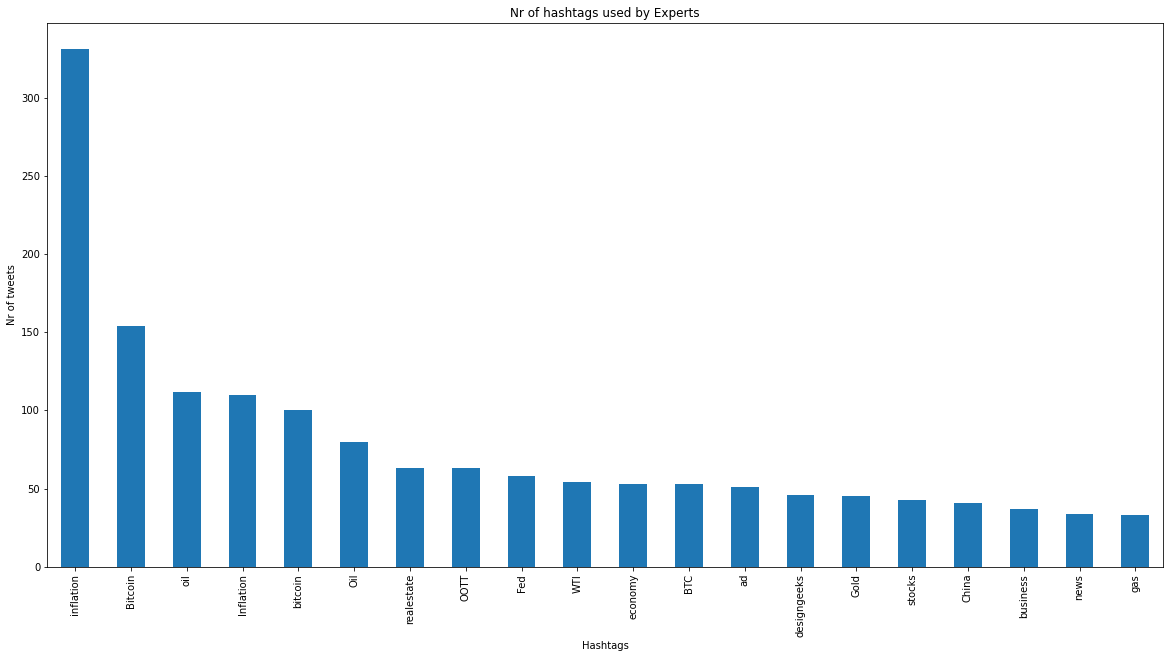

In [38]:
top_hash_professionals = top_hashtags(df234_professionals,'Experts')

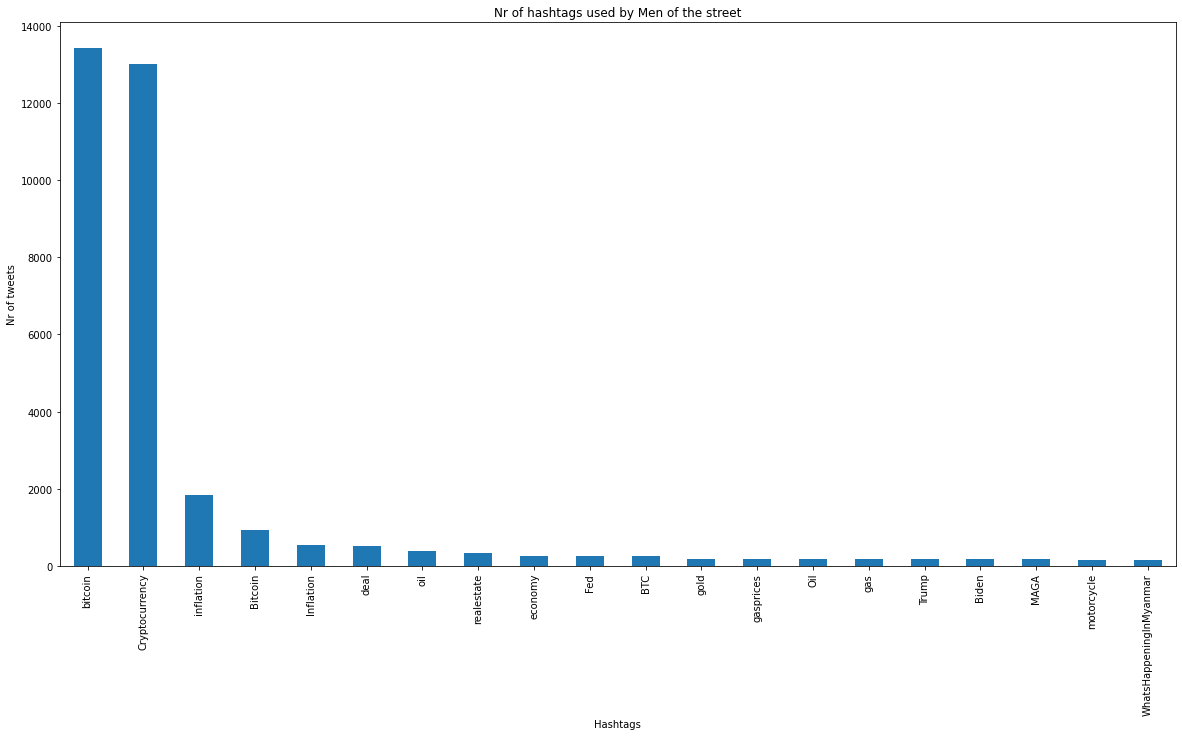

In [37]:
top_hash_men = top_hashtags(df234_men,'Men of the street')

#### Let's visualize the geographic distribution of the tweets.

We import the file for visualizing the US map

In [40]:
states = gpd.read_file('/content/drive/MyDrive/Colab_TwitterIndicators/cb_2021_us_all_20m/cb_2021_us_state_20m/cb_2021_us_state_20m.shp')
states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,22,01629543,0400000US22,22,LA,Louisiana,00,111915258185,23736382213,"POLYGON ((-94.04305 32.69303, -94.04303 32.797..."
1,02,01785533,0400000US02,02,AK,Alaska,00,1478942847588,245378425142,"MULTIPOLYGON (((179.48132 51.97530, 179.58286 ..."
2,24,01714934,0400000US24,24,MD,Maryland,00,25151992308,6979074857,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ..."
3,55,01779806,0400000US55,55,WI,Wisconsin,00,140292321657,29343646672,"MULTIPOLYGON (((-86.93428 45.42115, -86.83575 ..."
4,12,00294478,0400000US12,12,FL,Florida,00,138961722096,45972570361,"MULTIPOLYGON (((-81.81169 24.56874, -81.75127 ..."


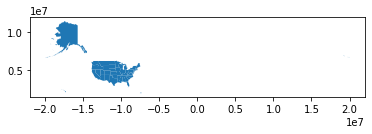

In [41]:
states = states.to_crs("EPSG:3395")
states.plot()

We now have to create the dataframe with the data we would like to display on the map. 

In [45]:
## tweets per region per men
tweets_per_region_men = df234_men.groupby('gnipregion').count()['id']
d_men = pd.DataFrame(tweets_per_region_men)
d_men.rename(columns = {'id':'tweet_per_region'}, inplace = True)


## tweets per region per professionals
tweets_per_region_prof = df234_professionals.groupby('gnipregion').count()['id']
d_prof = pd.DataFrame(tweets_per_region_prof)
d_prof.rename(columns = {'id':'tweet_per_region'}, inplace = True)


In [46]:
states.rename(columns = {'NAME':'gnipregion'}, inplace = True)

In [47]:
map_and_stats_men=states.merge(d_men, on="gnipregion")
map_and_stats_prof=states.merge(d_prof, on="gnipregion")

In [50]:
def map_plot(df, title):
  fig, ax = plt.subplots(1, figsize=(60,20))

  df.plot(column="tweet_per_region", cmap="magma_r", 
                    ax=ax,linewidth=0.8,edgecolor='0.8'
                    )
  ax.set_title('Tweets location in US by '+title, fontdict={'fontsize': '55', 'fontweight' : '3'})
  ax.axis('off')

  # Create colorbar as a legend
  sm = plt.cm.ScalarMappable(cmap='magma_r')
  # empty array for the data range
  sm._A = []
  # add the colorbar to the figure
  cbar = fig.colorbar(sm)
  cbar.ax.tick_params(labelsize=25)




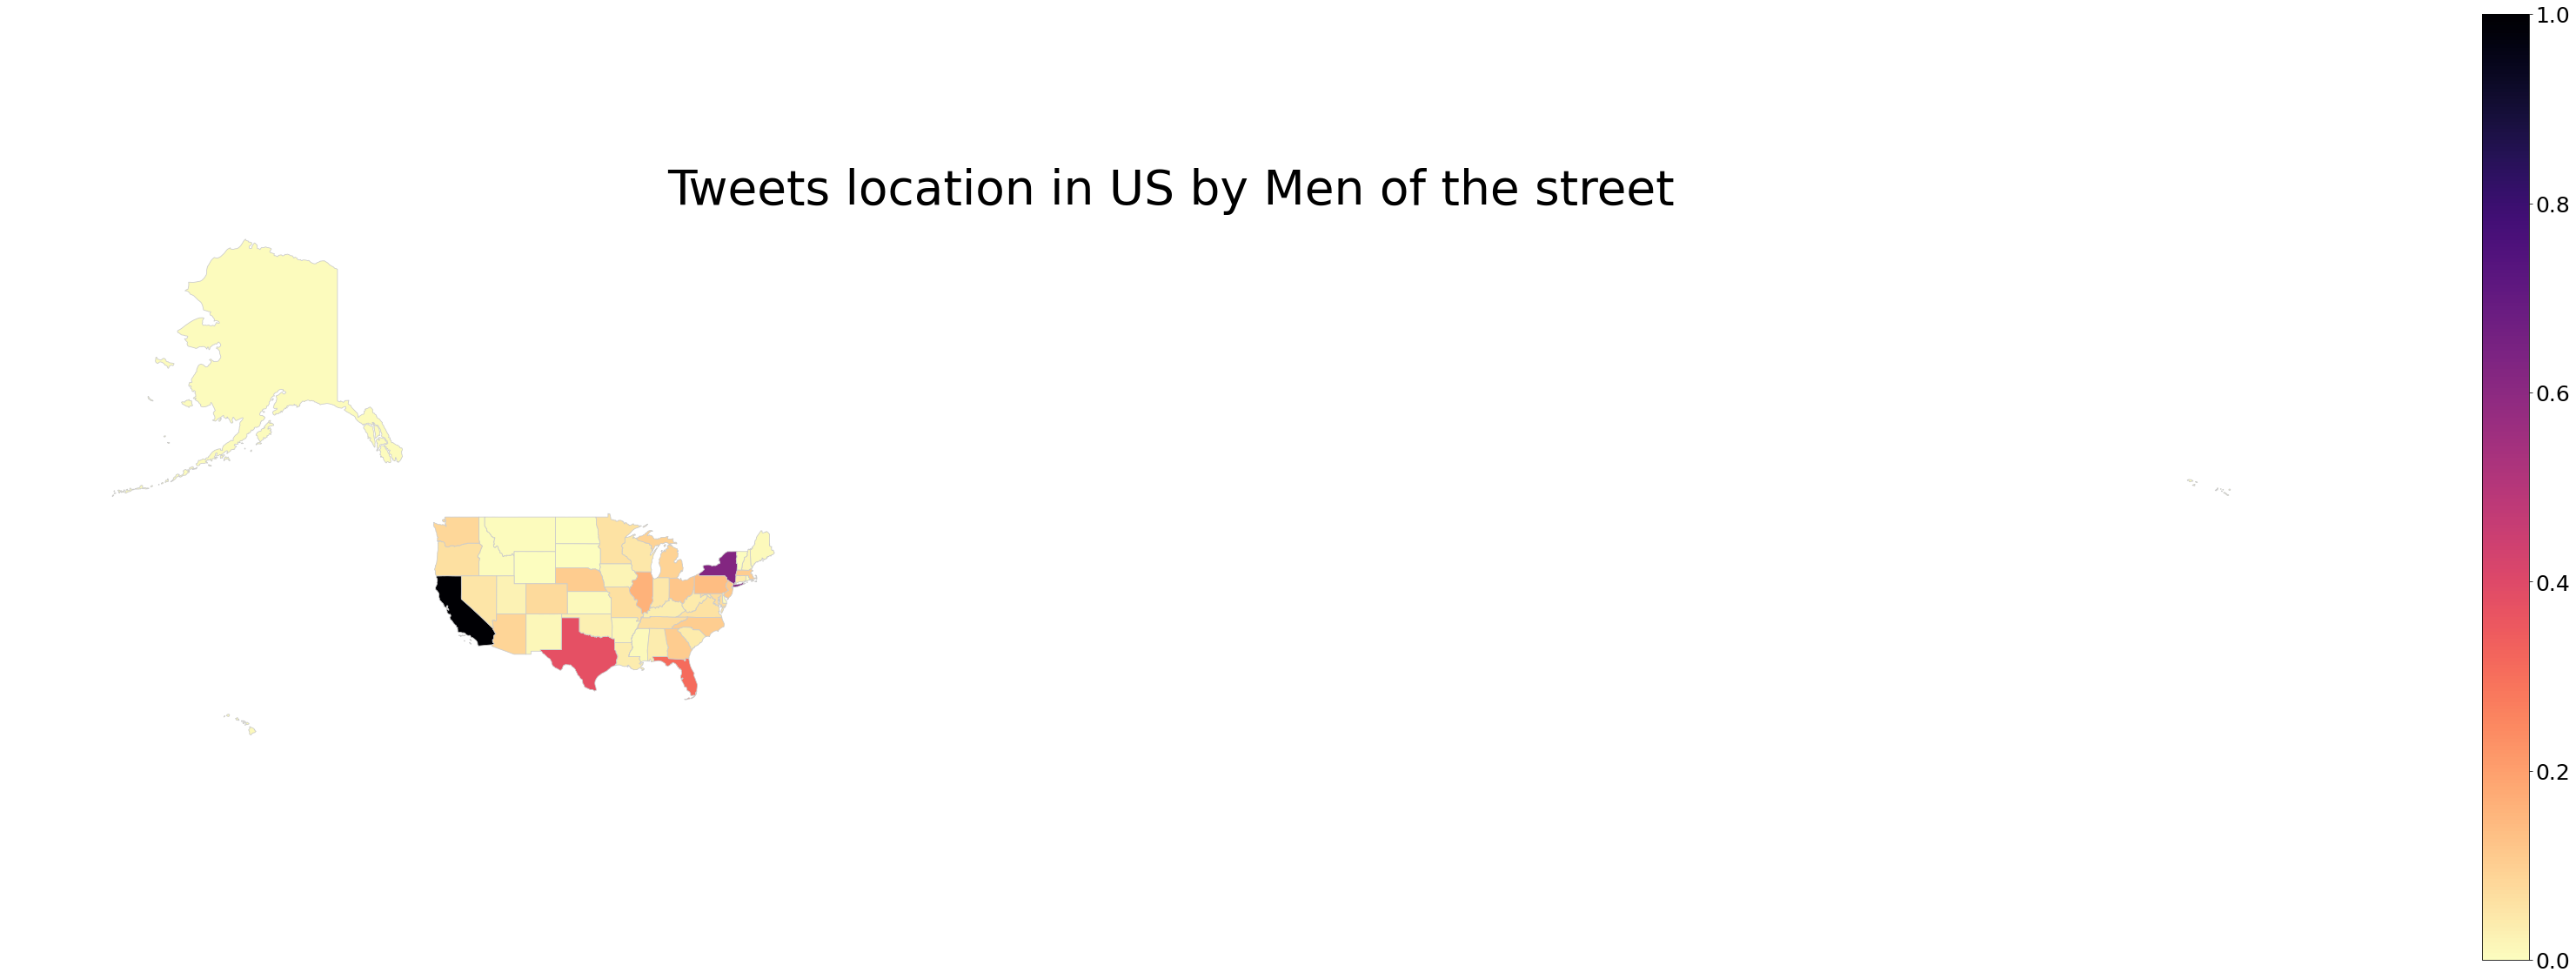

In [51]:
map_men = map_plot(map_and_stats_men, 'Men of the street')


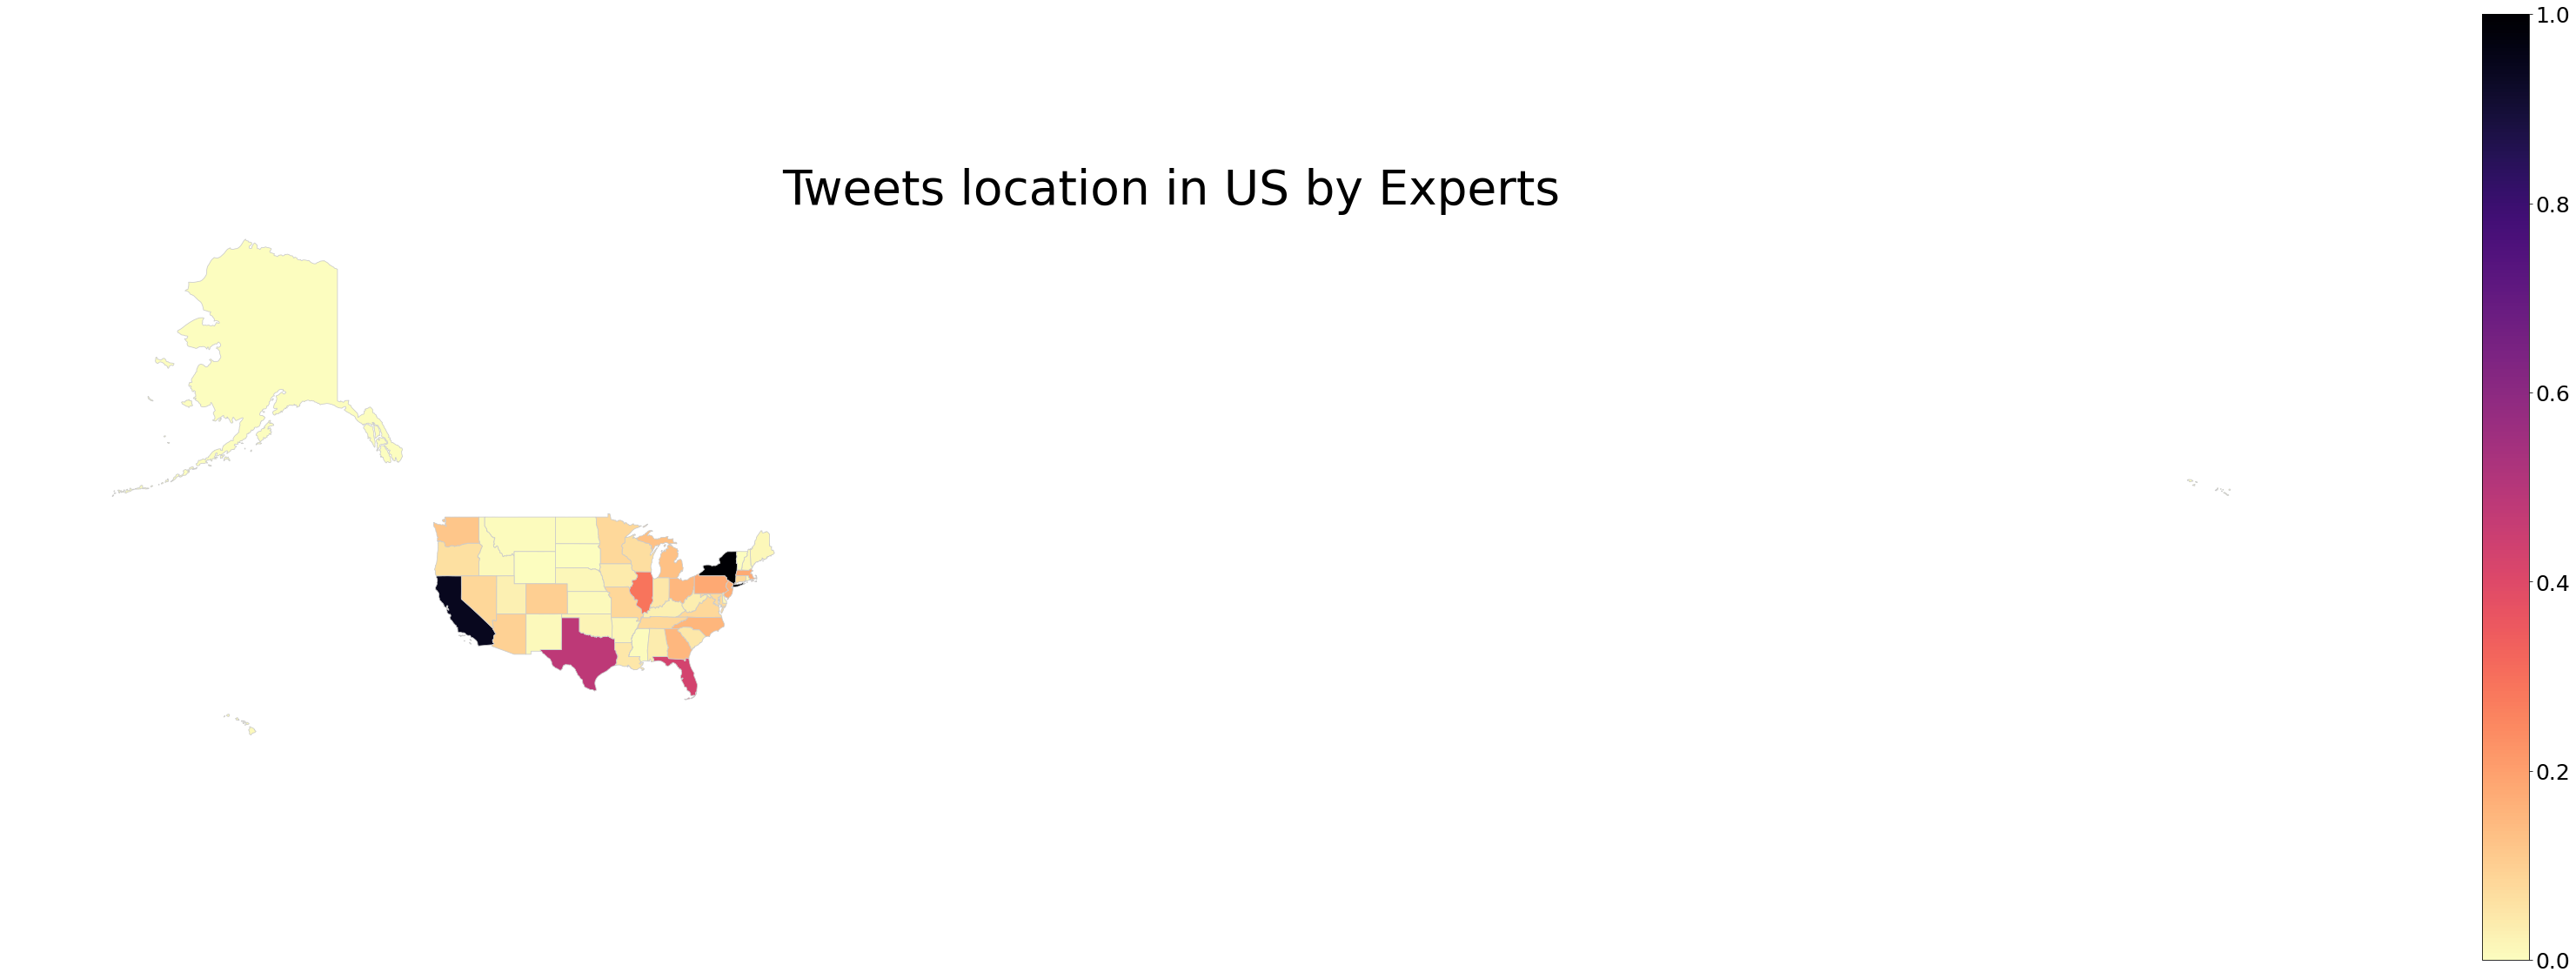

In [52]:
map_prof = map_plot(map_and_stats_prof, 'Experts')

#### Tweet distribution for years

In [53]:
def left(s, amount=4):
    return s[:amount]

In [101]:
df234_men.to_csv('/content/drive/MyDrive/Colab_TwitterIndicators/df234_men.csv')

In [103]:
df234_professionals['year_tweet'] = df234_professionals['postedtime_y'].apply(lambda x: left(x))

TypeError: ignored

In [75]:
cr_date= datetime.strptime(df234_men['postedtime_y'].iloc[0], '%Y-%m-%d')
left(cr_date.strftime('%Y-%m-%d'),4)

'2018'

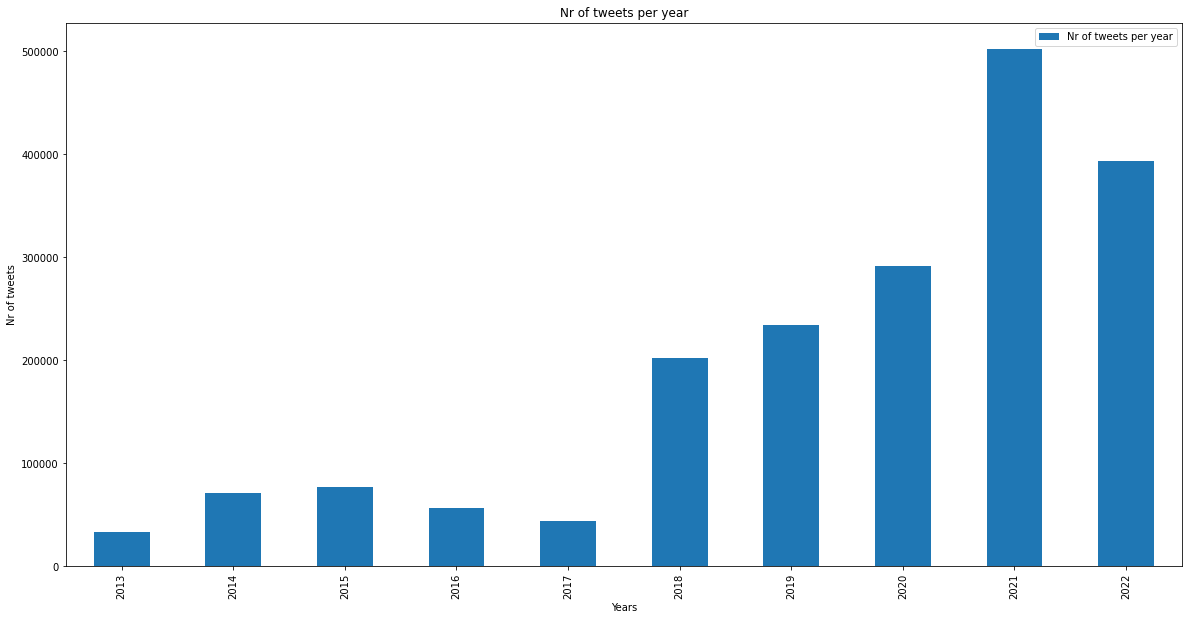

In [ ]:
tweets_per_year = df123.groupby('year_tweet').count()['id']
d_tweets_per_year = pd.DataFrame(tweets_per_year)
d_tweets_per_year.rename(columns = {'id':'Nr of tweets per year'}, inplace = True)
d_tweets_per_year.plot.bar(figsize=(20,10))
plt.title('Nr of tweets per year')
plt.xlabel('Years')
plt.ylabel('Nr of tweets')
plt.savefig("N of tweets per year.png")

In [ ]:
## hashtags per year

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(5, 2)

In [ ]:
df4['year_tweet'] = df4['postedtime'].apply(lambda x: left(x))
df4['year_tweet']

0         2018
1         2018
2         2018
3         2018
4         2018
          ... 
351184    2018
351185    2018
351186    2018
351187    2018
351188    2018
Name: year_tweet, Length: 351189, dtype: object

In [ ]:
years = df4['year_tweet'].unique()

In [ ]:
df4

,id,hashtag,postedtime,year_tweet
0,"tag:search.twitter.com,2005:1000149645920735232",GoogleAlerts,2018-05-25,2018
1,"tag:search.twitter.com,2005:1001514341684908033",gatewayseries,2018-05-29,2018
2,"tag:search.twitter.com,2005:1002345545644425216",trump,2018-06-01,2018
3,"tag:search.twitter.com,2005:1002868050176200704",motorcycle,2018-06-02,2018
4,"tag:search.twitter.com,2005:1003071303828541441",TedeschiTrucksBand,2018-06-03,2018
...,...,...,...,...
351184,"tag:search.twitter.com,2005:996406628751675392",postlive,2018-05-15,2018
351185,"tag:search.twitter.com,2005:997150997544873989",cosplay,2018-05-17,2018
351186,"tag:search.twitter.com,2005:997225996100292614",FreeTheBear,2018-05-17,2018
351187,"tag:search.twitter.com,2005:997225996100292614",CalExit,2018-05-17,2018


In [ ]:
df4['hashtag'].groupby(df4[['year_tweet']=='2018'])

In [ ]:
for i in years:
    print(i)

2018
2019
2020
2021
2022
2013
2014
2015
2016
2017


In [ ]:
tweets_per_year = df123.groupby('year_tweet').count()['id']
d_tweets_per_year = pd.DataFrame(tweets_per_year)
d_tweets_per_year.rename(columns = {'id':'Nr of tweets per year'}, inplace = True)
d_tweets_per_year.plot.bar(figsize=(20,10))
plt.title('Nr of tweets per year')
plt.xlabel('Years')
plt.ylabel('Nr of tweets')
plt.savefig("N of tweets per year.png")

In [ ]:
df4_2022 = df4[df4['year_tweet']=='2022']
df4_2021 = df4[df4['year_tweet']=='2021']
df4_2020 = df4[df4['year_tweet']=='2020']
df4_2019 = df4[df4['year_tweet']=='2019']
df4_2018 = df4[df4['year_tweet']=='2018']
df4_2017 = df4[df4['year_tweet']=='2017']
df4_2016 = df4[df4['year_tweet']=='2016']
df4_2015 = df4[df4['year_tweet']=='2015']
df4_2014 = df4[df4['year_tweet']=='2014']
df4_2013 = df4[df4['year_tweet']=='2013']

In [ ]:
count2013 =  df4_2013['hashtag'].value_counts()
count2014 =  df4_2014['hashtag'].value_counts()
count2015 =  df4_2015['hashtag'].value_counts()
count2016 =  df4_2016['hashtag'].value_counts()
count2017 =  df4_2017['hashtag'].value_counts()
count2018 =  df4_2018['hashtag'].value_counts()
count2019 =  df4_2019['hashtag'].value_counts()
count2020 =  df4_2020['hashtag'].value_counts()
count2021 =  df4_2021['hashtag'].value_counts()
count2022 =  df4_2022['hashtag'].value_counts()



In [ ]:
count2013[0:10].plot.bar()
count2014[0:10].plot.bar()
count2015[0:10].plot.bar()
count2016[0:10].plot.bar()
count2017[0:10].plot.bar()
count2018[0:10].plot.bar()
count2019[0:10].plot.bar()
count2020[0:10].plot.bar()
count2021[0:10].plot.bar()
count2022[0:10].plot.bar()



<AxesSubplot:>

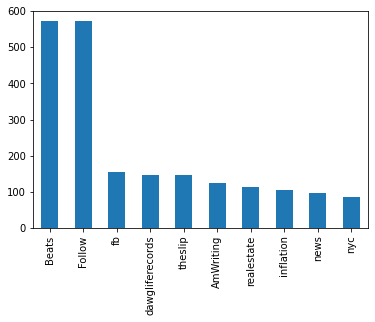

In [ ]:
count2013[0:10].plot.bar()

<AxesSubplot:>

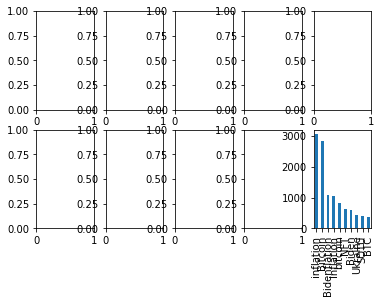

In [ ]:
#x = np.arange(0,6454)
figure, axis = plt.subplots(2, 5)

#For 2013
count2013[0:10].plot.bar()
count2014[0:10].plot.bar()
count2015[0:10].plot.bar()
count2016[0:10].plot.bar()
count2017[0:10].plot.bar()
count2018[0:10].plot.bar()
count2019[0:10].plot.bar()
count2020[0:10].plot.bar()
count2021[0:10].plot.bar()
count2022[0:10].plot.bar()


In [ ]:
# Get the angles from 0 to 2 pie (360 degree) in narray object
X = np.arange(0, math.pi*2, 0.05)
  
# Using built-in trigonometric function we can directly plot
# the given cosine wave for the given angles
Y1 = np.sin(X)
Y2 = np.cos(X)
Y3 = np.tan(X)
Y4 = np.tanh(X)
  
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(2, 2)
  
# For Sine Function
axis[0, 0].plot(X, Y1)
axis[0, 0].set_title("Sine Function")
  
# For Cosine Function
axis[0, 1].plot(X, Y2)
axis[0, 1].set_title("Cosine Function")
  
# For Tangent Function
axis[1, 0].plot(X, Y3)
axis[1, 0].set_title("Tangent Function")
  
# For Tanh Function
axis[1, 1].plot(X, Y4)
axis[1, 1].set_title("Tanh Function")
  
# Combine all the operations and display
plt.show()
